In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d gpiosenka/sports-classification
! unzip sports-classification.zip -d /content/drive/MyDrive/Datasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Datasets/train/rings/022.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/023.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/024.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/025.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/026.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/027.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/028.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/029.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/030.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/031.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/032.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/033.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/034.jpg  
  inflating: /content/drive/MyDrive/Datasets/train/rings/035.jpg  
  inflating

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas


In [ ]:
!pip install scikit-learn


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

### **Loading the model**

In [ ]:
imageSize=[224,224]
train_path = '/content/drive/MyDrive/Datasets/train'
test_path = '/content/drive/MyDrive/Datasets/test'

vgg = VGG16(input_shape=imageSize + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


**Adding Flatten layers**

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders = glob('/content/drive/MyDrive/Datasets/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Datasets/train/air hockey',
 '/content/drive/MyDrive/Datasets/train/ampute football',
 '/content/drive/MyDrive/Datasets/train/archery',
 '/content/drive/MyDrive/Datasets/train/arm wrestling',
 '/content/drive/MyDrive/Datasets/train/axe throwing',
 '/content/drive/MyDrive/Datasets/train/balance beam',
 '/content/drive/MyDrive/Datasets/train/barell racing',
 '/content/drive/MyDrive/Datasets/train/baseball',
 '/content/drive/MyDrive/Datasets/train/basketball',
 '/content/drive/MyDrive/Datasets/train/baton twirling',
 '/content/drive/MyDrive/Datasets/train/bike polo',
 '/content/drive/MyDrive/Datasets/train/billiards',
 '/content/drive/MyDrive/Datasets/train/bmx',
 '/content/drive/MyDrive/Datasets/train/bobsled',
 '/content/drive/MyDrive/Datasets/train/bowling',
 '/content/drive/MyDrive/Datasets/train/boxing',
 '/content/drive/MyDrive/Datasets/train/bull riding',
 '/content/drive/MyDrive/Datasets/train/bungee jumping',
 '/content/drive/MyDrive/Datasets/train/canoe 

In [ ]:
x= Flatten()(vgg.output)

**Adding Output layer**

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

**Model summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**configure the learning process**

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'], run_eagerly=True
)

**Data Augmentation and Loading**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./225,
                                   shear_range = 0.2,
                                   zoom_range =0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./225)



**Apply ImageDataGenerator functionality to Trainset and Testset**

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'categorical')


Found 13492 images belonging to 100 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=2,
                                            class_mode ='categorical')

Found 500 images belonging to 100 classes.


**Train the Model**

In [ ]:
import sys
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch = len(training_set)//15,
    validation_steps = len(test_set)//15
)

Epoch 1/100


<ipython-input-23-a041fa9d0c72>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


449/449 [==============================] - 41s 90ms/step - loss: 9.4064 - accuracy: 0.2483 - val_loss: 7.7111 - val_accuracy: 0.4062
Epoch 2/100
449/449 [==============================] - 40s 89ms/step - loss: 8.7206 - accuracy: 0.3352 - val_loss: 8.0747 - val_accuracy: 0.3750
Epoch 3/100
449/449 [==============================] - 39s 88ms/step - loss: 8.4110 - accuracy: 0.3842 - val_loss: 6.1427 - val_accuracy: 0.5000
Epoch 4/100
449/449 [==============================] - 39s 87ms/step - loss: 7.9746 - accuracy: 0.3909 - val_loss: 6.7843 - val_accuracy: 0.4375
Epoch 5/100
449/449 [==============================] - 38s 85ms/step - loss: 7.3811 - accuracy: 0.4488 - val_loss: 5.3595 - val_accuracy: 0.4688
Epoch 6/100
449/449 [==============================] - 39s 87ms/step - loss: 7.3127 - accuracy: 0.4532 - val_loss: 4.7674 - val_accuracy: 0.5312
Epoch 7/100
449/449 [==============================] - 40s 89ms/step - loss: 6.8780 - accuracy: 0.4844 - val_loss: 3.6943 - val_accuracy: 0.71

In [ ]:
 import matplotlib.pyplot as plt


**Train loss**

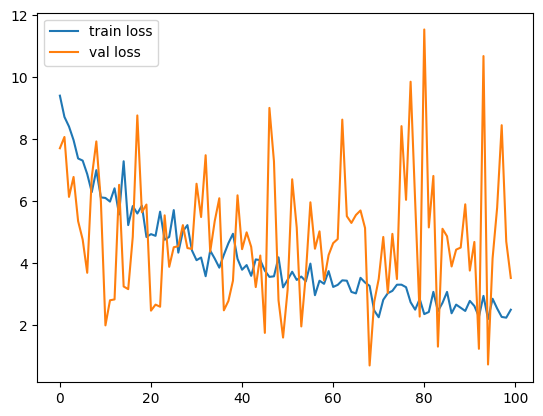

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



**Train accuracy**

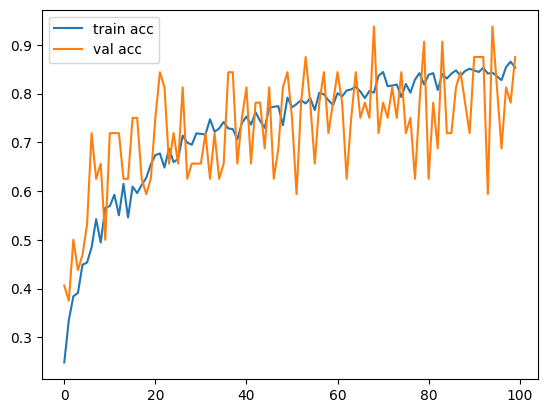

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**save the model**

In [ ]:
from tensorflow.keras.models import load_model

model.save('Sports_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
